# Practice Project - 3

# Medical Cost Personal Insurance Datasets

**Problem Statement:**
**Insurance Forecast by using Linear Regression**

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

**Columns**                                          

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

**Predict : Charges**  Can you accurately predict insurance costs?

In [112]:
import pandas as pd

In [113]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
data.shape

(1338, 7)

In [115]:
print("no. of Rows: ",data.shape[0])

print("no. of Columns: ",data.shape[1])

no. of Rows:  1338
no. of Columns:  7


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [117]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [118]:
data.describe() # getting overall statistics of the dataset.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [119]:
# Converting columns from string['sex','smoker','region'] to numerical values:

In [120]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [121]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [122]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [123]:
data['smoker'] = data['smoker'].map({'no':0,'yes':1})

In [124]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [125]:
data['region'] = data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [126]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [127]:
# Splitting feature & Label data: 

In [128]:
data.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [129]:
X = data.drop(['charges'],axis=1) # Storing Feature matrix in X.

In [130]:
y = data['charges'] # # Storing label(response oe Target) in vector y.

In [131]:
# Train-Test Split:

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

In [133]:
y_train # not selecting random_state gives different y_train everytime.

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [135]:
# Import the models:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
# Model training:

In [137]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [138]:
# Prediction on Test Data:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)


# comparing Actual & Predicted Values:
df1 = pd.DataFrame({'Actual':y_test, 'Linear_Reg':y_pred1,
                    'SVR':y_pred2 ,'RF_Reg':y_pred3,
                    'GB_Reg':y_pred4})
df1

,Actual,Linear_Reg,SVR,RF_Reg,GB_Reg
589,5976.83110,8007.999047,9146.122428,6210.793351,6733.275955
383,5846.91760,11596.557403,9135.477527,6993.668477,6468.092824
534,13831.11520,17010.956029,9286.220737,14153.563787,12733.829486
284,9625.92000,11071.252752,9235.808209,12729.126494,11150.278572
821,2680.94930,527.630822,9085.270308,7197.107409,9333.492168
...,...,...,...,...,...
379,27000.98473,14127.945158,9283.028054,14685.209132,15580.445578
584,1242.81600,-739.552431,9061.706522,1299.411566,1387.220414
1301,46718.16325,38760.664946,9282.810072,45917.937637,45661.433611
1239,3238.43570,8266.319665,9086.678719,4181.091577,4538.091442


In [139]:
# Comparing Model Performance:

In [140]:
import matplotlib.pyplot as plt

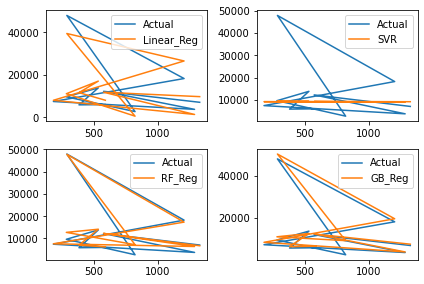

In [141]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Linear_Reg'].iloc[0:11],label='Linear_Reg')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVR'].iloc[0:11],label='SVR')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['RF_Reg'].iloc[0:11],label='RF_Reg')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['GB_Reg'].iloc[0:11],label='GB_Reg')
plt.legend()

plt.tight_layout() # to avoid overlapping


In [142]:
# model_4 is overlapping-> good model.

In [143]:
# Evaluating the Model:

from sklearn import metrics

score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [144]:
print(score1,score2,score3,score4)

0.7802899946296715 -0.1389236200039332 0.8602047827692231 0.8757585183595198


In [145]:
# model_4 - max r2-> good model.

In [146]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [147]:
print(s1,s2,s3,s4)

3923.3728154785235 8529.524806851248 2640.986838874443 2480.6934981868108


In [148]:
# model_4 - min MAE-> good model.

In [157]:
# Predict Charges for New Customers:

data = {'age':40, 'sex':1, 'bmi':40.30, 'children':4, 'smoker':1,' region':2}

df3 = pd.DataFrame(data,index=[0])
df3

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [159]:
# Lets predict charges (for newly arrived data):

new_pred = gr.predict(df3)
print(new_pred)

[42205.67921759]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  region
Feature names seen at fit time, yet now missing:
- region

  warnings.warn(message, FutureWarning)


In [160]:
# save Model:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [161]:
import joblib

In [162]:
joblib.dump(gr,'Insurance Charge prediction using GB_reg')

['Insurance Charge prediction using GB_reg']

In [163]:
# Loading the saved model, for future prediction:

model=joblib.load('Insurance Charge prediction using GB_reg')

In [165]:
model.predict(df3) # predicting with new features.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  region
Feature names seen at fit time, yet now missing:
- region

  warnings.warn(message, FutureWarning)


array([42148.361888])